<a href="https://colab.research.google.com/github/husnul122430099/test/blob/main/SimpleCNN_13_HusnulFatimah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Masukan Datapath dari Drive

In [ ]:
data_path = "/content/drive/MyDrive/Kecerdasan Buatan/Minggu 13/digits updated"


Load Dataset (Training & Validation)

In [ ]:
import tensorflow as tf

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(28, 28),
    color_mode="grayscale",
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(28, 28),
    color_mode="grayscale",
    batch_size=32
)

Found 10174 files belonging to 1 classes.
Using 8140 files for training.
Found 10174 files belonging to 1 classes.
Using 2034 files for validation.


In [ ]:
print("Class names:", train_ds.class_names)


Class names: ['digits updated']


Normalisasi Dataset

In [ ]:
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds   = val_ds.map(lambda x, y: (x / 255.0, y))


Bangun Model CNN Sederhana

In [20]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import BatchNormalization, Dropout

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    BatchNormalization(),
    Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    BatchNormalization(),
    Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax') # Corrected for multi-class classification
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,930 (882.54 KB)

 Trainable params: 225,482 (880.79 KB)

 Non-trainable params: 448 (1.75 KB)

Kompilasi Model

In [21]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Training Model

In [22]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    callbacks=[early_stop]
)



Epoch 1/5
255/255 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7660 - loss: 0.8011 - val_accuracy: 0.9739 - val_loss: 0.0875
Epoch 2/5
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9556 - loss: 0.1456 - val_accuracy: 0.9867 - val_loss: 0.0544
Epoch 3/5
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9704 - loss: 0.0889 - val_accuracy: 0.9887 - val_loss: 0.0449
Epoch 4/5
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9807 - loss: 0.0652 - val_accuracy: 0.9907 - val_loss: 0.0324
Epoch 5/5
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9840 - loss: 0.0477 - val_accuracy: 0.9887 - val_loss: 0.0311


Evaluasi Model

In [23]:
test_loss, test_acc = model.evaluate(val_ds)
print("Validation accuracy:", test_acc)


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9876 - loss: 0.0388
Validation accuracy: 0.9886922240257263


Prediksi Gambar

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
Predicted class: 4


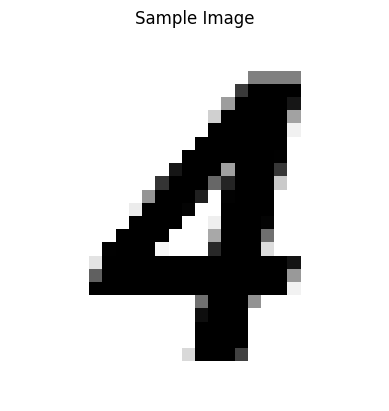

In [24]:
import matplotlib.pyplot as plt
import tensorflow as tf

for images, labels in val_ds.take(1):
    img = images[0]

    # Tampilkan gambar
    plt.imshow(img.numpy().reshape(28,28), cmap='gray')
    plt.title("Sample Image")
    plt.axis('off')

    # Prediksi
    img_expanded = tf.expand_dims(img, axis=0)
    pred = model.predict(img_expanded)
    predicted_class = class_names[tf.argmax(pred[0]).numpy()]

    print("Predicted class:", predicted_class)

plt.show()

Plot Grafik Akurasi dan Loss

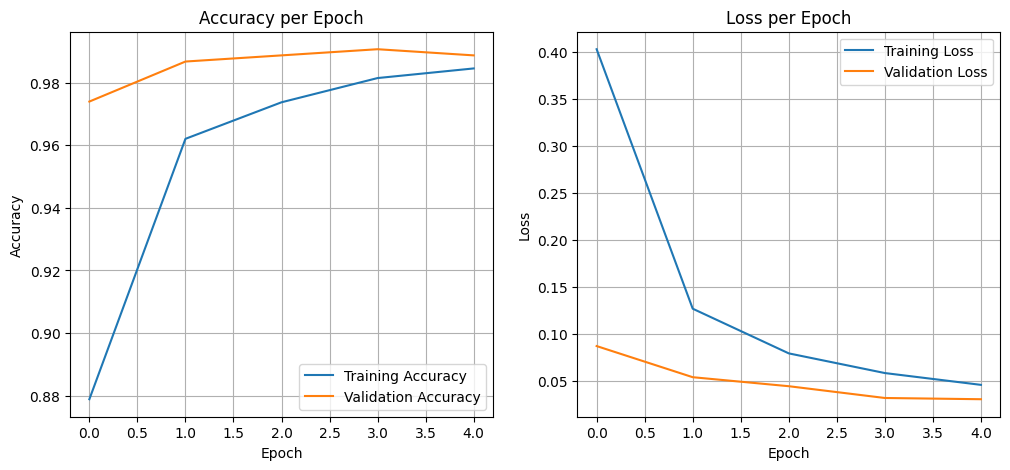

In [25]:
import matplotlib.pyplot as plt

# Plot Akurasi
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()


Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

<Figure size 800x800 with 0 Axes>

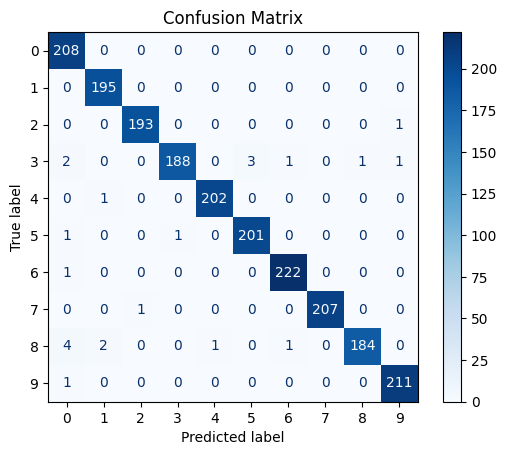

In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Digunakan untuk mengambil semua gambar dan label dari validation set
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    preds = tf.argmax(preds, axis=1).numpy()

    y_true.extend(labels.numpy())
    y_pred.extend(preds)

# Konversi ke dalam bentuk array
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(8,8))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()